In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from openpyxl import load_workbook
import seaborn as sns

In [2]:
RetailSales=pd.read_csv('China2020_2021\社会消费品零售总额.csv')
RetailSales=RetailSales.iloc[:, ::-1]

In [3]:
RetailSales.loc[2].mean()

12836.478947368421

In [4]:
RetailSales.loc[2].max()

16300.8

In [5]:
RetailSales.loc[2].min()

9984.3

In [6]:
RetailSales.loc[2].std()

1617.6056433228534

In [7]:
from scipy.stats import skew
skew(RetailSales.loc[2].dropna())

0.38474066443529636

In [8]:
from scipy.stats import variation
variation(RetailSales.loc[2].dropna())

0.12265526428153607

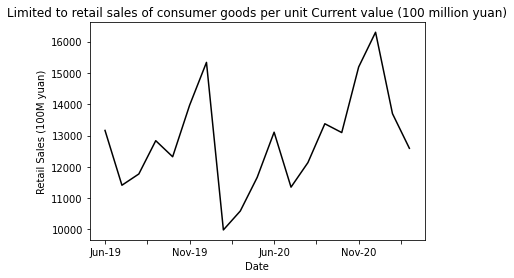

In [9]:
RetailSales.loc[2].dropna().plot(color='black')
plt.title("Limited to retail sales of consumer goods per unit Current value (100 million yuan)")
plt.xlabel("Date")
plt.ylabel("Retail Sales (100M yuan)")
plt.show()

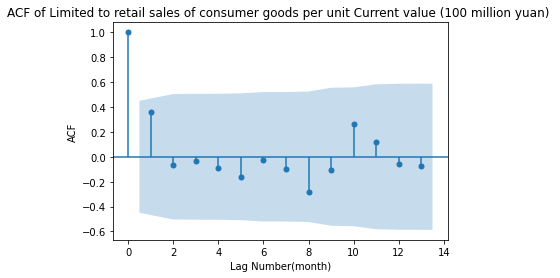

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(RetailSales.loc[2].dropna())
plt.title("ACF of Limited to retail sales of consumer goods per unit Current value (100 million yuan) ")
plt.xlabel("Lag Number(month)")
plt.ylabel("ACF")
plt.show()

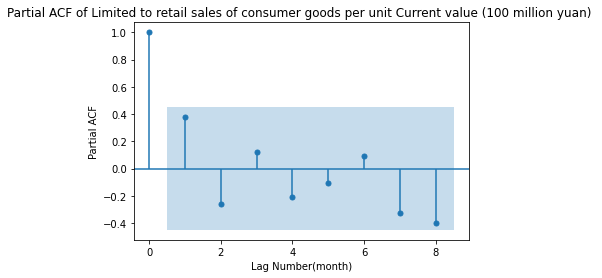

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(RetailSales.loc[2].dropna(), lags=8)
plt.title("Partial ACF of Limited to retail sales of consumer goods per unit Current value (100 million yuan) ")
plt.xlabel("Lag Number(month)")
plt.ylabel("Partial ACF")
plt.show()

In [12]:
CarData=pd.read_csv('China2020_2021\汽车类商品零售类值(PMP).csv')
CarData=CarData.iloc[:, ::-1]

In [13]:
JewelData=pd.read_csv('China2020_2021\金银珠宝类商品零售类值(PMP).csv')
JewelData=JewelData.iloc[:, ::-1]

In [14]:
FurnitureData=pd.read_csv('China2020_2021\家具类商品零售类值(NM).csv')
FurnitureData=FurnitureData.iloc[:, ::-1]

In [15]:
ClothData=pd.read_csv('China2020_2021\服装鞋帽、针、纺织品类商品零售类值(NM).csv')
ClothData=ClothData.iloc[:, ::-1]

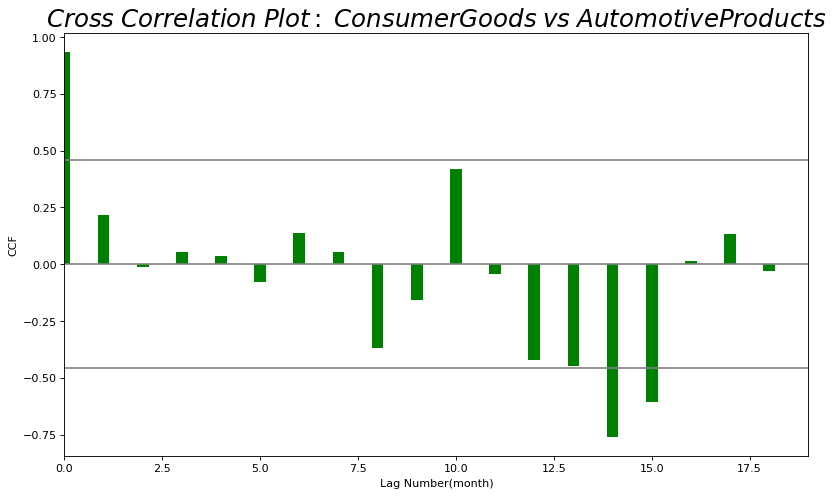

In [16]:
import statsmodels.tsa.stattools as stattools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Data
x = RetailSales.loc[2].dropna()
y = CarData.loc[0].dropna()

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3,color='green')
plt.xlabel("Lag Number(month)")
plt.ylabel("CCF")
# Decoration
plt.title('$Cross\; Correlation\; Plot:\; Consumer Goods\; vs\; Automotive Products$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

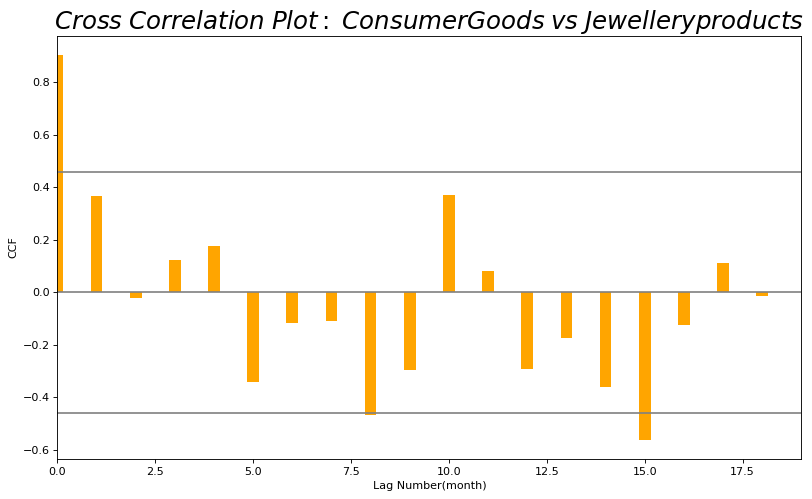

In [17]:
# Import Data
x = RetailSales.loc[2].dropna()
y = JewelData.loc[0].dropna()

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3,color='orange')
plt.xlabel("Lag Number(month)")
plt.ylabel("CCF")
# Decoration
plt.title('$Cross\; Correlation\; Plot:\; Consumer Goods\; vs\; Jewellery products$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

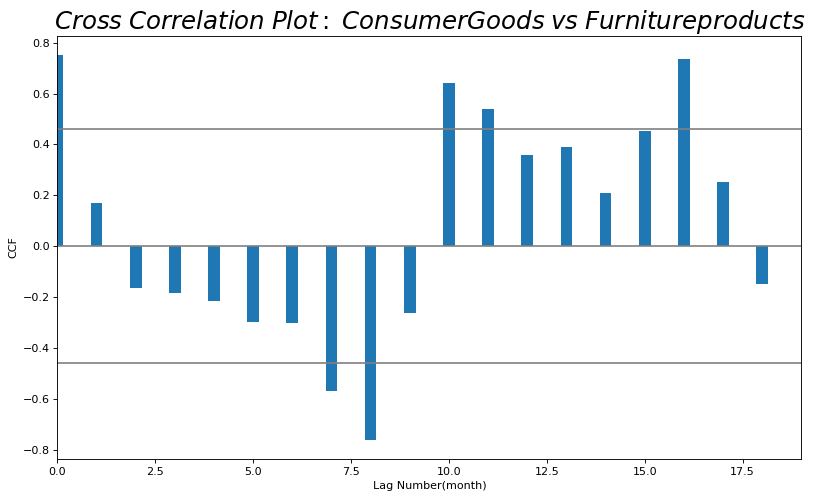

In [18]:
# Import Data
x = RetailSales.loc[2].dropna()
y = FurnitureData.loc[0].dropna()

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)
plt.xlabel("Lag Number(month)")
plt.ylabel("CCF")
# Decoration
plt.title('$Cross\; Correlation\; Plot:\; Consumer Goods\; vs\; Furniture products$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

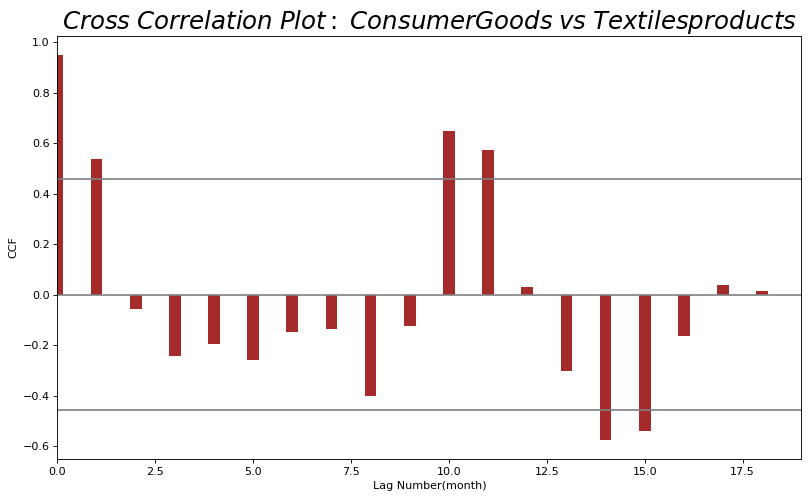

In [19]:
# Import Data
x = RetailSales.loc[2].dropna()
y = ClothData.loc[0].dropna()

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3,color='brown')
plt.xlabel("Lag Number(month)")
plt.ylabel("CCF")
# Decoration
plt.title('$Cross\; Correlation\; Plot:\; Consumer Goods\; vs\; Textiles products$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

In [20]:
#R{11}, R{10},R{9},R{8},R{7}
#C{11}, G{11},F{17},T{11}